# Logistic Regression
 🌯

Using a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/), build a model that predicts whether a burrito is rated `'Great'`?

## Tasks-- Tutorial

- [ ] Make a copy of this notebook to work on - you can download if you have a local Jupyter setup, or click `File > Save a copy in Drive` to copy and work on with Google Colab
- [ ] Import the burrito `csv` file into a `DataFrame`. Your target will be the `'Great'` column.
- [ ] Conduct exploratory data analysis (EDA) to determine how you should clean the data for your pipeline.
- [ ] Clean your data. (Note: You are not required to use all columns in your model, but justify your decisions based on your EDA.)
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Determine what the baseline accuracy is for a naïve classification model.
- [ ] Create a `scikit-learn` pipeline with the following components:
  - A one hot encoder for categorical features.
  - A scaler.
  - A logistic regressor.
- [ ] Train your model using the training data.
- [ ] Create a visualization showing your model's coefficients.
- [ ] Get your model's validation accuracy (multiple times if you try multiple iterations).
- [ ] Get your model's test accuracy (one time, at the end).

---

# Table of Contents (with hyperlinks)

- [Exploratory data analysis (EDA)](#A)
- [Data Cleaning](#B)
- [Create dummies for categorical variables](#C)
- [Train/Validate/Test split](#D)
- [Imputer for missing values](#E)
- [Data Transformation - Scaling](#F)
- [Model Fitting: Classification](#G)
- [Create visualization of model coefficients](#H)
- [Train/Validate/Test split for creating a pipeline](#I)
- [Determine baseline accuracy for a naïve classification model](#J)
- [Create a scikit-learn pipeline](#K)
- [Train model using training data](#L)
- [Get model's validation accuracy](#M)
- [Get your model's test accuracy](#N)

### Import the burrito `csv` file

In [242]:
# Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1cctPq1sYeD6Y6mGg5Lpl-GLDJBwtdihg')

## Exploratory data analysis (EDA) <a id="A"></a>
- Use describe() to check for min,max, mean and std dev values. Also gives us initial insight of the data.
- Use info() to get information of differnet data types and if they need tobe changed. Ex Date datatype needs to be changed to Datetime. 
- Check for class imbalance problem.
- Use columns() to see all the columns in the dataset and do feature selection.
- [Create a heatmap to find out the correlation of different features with the target variable.](#A1)

In [450]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [422]:
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso
count,87.000000,87.000000,414.000000,418.000000,22.000000,22.000000,283.000000,281.000000,281.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,0.0
mean,3.887356,4.167816,7.067343,3.495335,546.181818,0.675277,20.038233,22.135765,0.786477,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,NaN
std,0.475396,0.373698,1.506742,0.812069,144.445619,0.080468,2.083518,1.779408,0.152531,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,NaN
75%,4.000000,4.400000,7.880000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


This tells us the count, min, max, mean and std dev of each of the features in our dataset. From this we can say that since Queso has all Nan values, we can safely remove that feature from our analysis.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 65 columns):
Location          421 non-null object
Burrito           421 non-null object
Date              421 non-null object
Neighborhood      92 non-null object
Address           88 non-null object
URL               87 non-null object
Yelp              87 non-null float64
Google            87 non-null float64
Chips             26 non-null object
Cost              414 non-null float64
Hunger            418 non-null float64
Mass (g)          22 non-null float64
Density (g/mL)    22 non-null float64
Length            283 non-null float64
Circum            281 non-null float64
Volume            281 non-null float64
Tortilla          421 non-null float64
Temp              401 non-null float64
Meat              407 non-null float64
Fillings          418 non-null float64
Meat:filling      412 non-null float64
Uniformity        419 non-null float64
Salsa             396 non-null float64
Synergy      

In [66]:
#To check for class imbalance problem
df['Great'].value_counts()

False    239
True     182
Name: Great, dtype: int64

Since there is not much difference between the number of samples for True and False. There is no class imbalance problem in this dataset.

In [141]:
df.columns

Index(['Location', 'Burrito', 'Date', 'Neighborhood', 'Address', 'URL', 'Yelp',
       'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
       'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
       'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Reviewer',
       'Notes', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

## Data Cleaning <a id="B"></a>
-	Found out the null values in the dataframe.
-	Drop some columns with large number of null values.
-   Drop categorical features with high cardinality (large number of different values).
-	Converted the ingredients columns to 1 if ingredient present and 0 otherwise.
-   Converted the target column to 0 for False and 1 for True.
-   Merged different Burrito categories into 6 categories - California, Carne Asada, Carnitas, Surf n Turf, Al Pastor and Other.
-   Filling in missing/ NaN values by taking the mode of the values in that column.
-   Finally reduced the number of columns from 65 to 52.

In [423]:
# let us find out the sum of the null values for all the columns. On the basis of that we can try filling missing values or imputing them.
df.isnull().sum()

Location            0
Burrito             0
Date                0
Neighborhood      329
Address           333
URL               334
Yelp              334
Google            334
Chips             395
Cost                7
Hunger              3
Mass (g)          399
Density (g/mL)    399
Length            138
Circum            140
Volume            140
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
Reviewer            1
Notes             275
Unreliable        388
NonSD             414
Beef              242
                 ... 
Pork              370
Chicken           400
Shrimp            400
Fish              415
Rice              385
Beans             386
Lettuce           410
Tomato            414
Bell peper        414
Carrots           420
Cabbage           413
Sauce             383
Salsa.1           414
Cilantro          406
Onion     

In [424]:
#Let us drop some columns which has a lot of null values and are not likely to be important in our classification because of there high cardinality.
cols=['Neighborhood', 'Address', 'URL', 'Mass (g)', 'Density (g/mL)', 'Yelp', 'Google', 'Notes', 'Unreliable', 'NonSD', 'Queso']
df1 = df.drop(columns=cols)

In [426]:
#Converted the ingredients columns to 1 if ingredient present and 0 otherwise.
cols=['Chips','Beef', 'Pico', 'Guac', 'Cheese',
       'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice',
       'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage',
       'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']
for col in cols:
    df1[col]=df1[col].apply(lambda x: 1 if not pd.isnull(x) else 0)

df1.head()

,Location,Burrito,Date,Chips,Cost,Hunger,Length,Circum,Volume,Tortilla,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/2016,1,6.49,3.0,NaN,NaN,NaN,3.0,...,1,1,0,0,0,0,0,0,0,False
1,Oscar's Mexican food,California,1/24/2016,1,5.45,3.5,NaN,NaN,NaN,2.0,...,1,1,0,0,0,0,0,0,0,False
2,Oscar's Mexican food,Carnitas,1/24/2016,1,4.85,1.5,NaN,NaN,NaN,3.0,...,1,1,0,0,0,0,0,0,0,False
3,Oscar's Mexican food,Carne asada,1/24/2016,1,5.25,2.0,NaN,NaN,NaN,3.0,...,1,1,0,0,0,0,0,0,0,False
4,Pollos Maria,California,1/27/2016,1,6.59,4.0,NaN,NaN,NaN,4.0,...,1,1,0,0,0,0,0,0,0,True


In [427]:
#Converted the target column to 0 for False and 1 for True.
df1['Great']=df1['Great'].astype('int')

In [428]:
# Lets take a look at the different burrito categories.
df1['Burrito'].value_counts()

California                   101
Carne asada                   29
California                    26
Carnitas                      23
Local                         14
Surf & Turf                   14
California Everything         13
Adobada                        9
Al pastor                      9
Surfin California              8
Holy Moly                      5
Custom                         5
Carne asada everything         4
Carne Asada                    3
2 in 1                         3
California - Pork Adobada      3
Pollo asado                    3
California everything          3
Pastor                         3
Al Pastor                      3
Breakfast                      3
Shrimp                         3
Chile Relleno                  3
Fish                           3
Chile verde pork               2
Campeon                        2
Veggie                         2
Bean and cheese                2
Hashbrown                      2
Asada                          2
          

We have a lot of burrito categories which are duplicates or have very less number of reviews. So we will merge those.

In [429]:
#We have converted all the categories to lower case so that it is easy to segregate them.
df1['Burrito']=df1['Burrito'].str.lower()

In [430]:
#We have merged all the Burrito categories into 6 categories - California, Carne Asada, Carnitas, Surf n Turf, Al Pastor and Other.
df1.loc[df1['Burrito'].str.contains('california'), 'Burrito'] = 'california'
df1.loc[df1['Burrito'].str.contains('carne|asada'), 'Burrito'] = 'carne asada'
df1.loc[df1['Burrito'].str.contains('carnitas'), 'Burrito'] = 'carnitas'
df1.loc[df1['Burrito'].str.contains('surf|turf'), 'Burrito'] = 'surf n turf'
df1.loc[df1['Burrito'].str.contains('pastor'), 'Burrito'] = 'al pastor'
#df1.loc[df1['Burrito'].str.contains('chicken'), 'Burrito'] = 'chicken'
#df1.loc[df1['Burrito'].str.contains('adobada'), 'Burrito'] = 'adobada'
df1.loc[~california & ~carne & ~carnitas & ~surf & ~pastor, 'Burrito'] = 'Other'

We have merged all the Burrito categories into 6 categories - California, Carne Asada, Carnitas, Surf n Turf, Al Pastor and Other.

In [431]:
# This shows the updated value counts for each of the categories
df1['Burrito'].value_counts()

california     180
Other          141
carne asada     41
carnitas        25
al pastor       17
surf n turf     17
Name: Burrito, dtype: int64

In [432]:
df1.tail()

,Location,Burrito,Date,Chips,Cost,Hunger,Length,Circum,Volume,Tortilla,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
416,Valentine's Mexican Food,al pastor,8/27/2019,1,6.0,1.0,17.0,20.5,0.57,5.0,...,1,1,0,0,0,0,0,0,0,0
417,Valentine's Mexican Food,Other,8/27/2019,1,6.0,4.0,19.0,26.0,1.02,4.0,...,1,1,0,0,0,0,0,0,0,1
418,Valentine's Mexican Food,california,8/27/2019,1,7.9,3.0,20.0,22.0,0.77,4.0,...,1,1,0,0,0,0,0,0,0,0
419,Valentine's Mexican Food,Other,8/27/2019,1,7.9,3.0,22.5,24.5,1.07,5.0,...,1,1,0,0,0,0,0,0,0,1
420,Valentine's Mexican Food,Other,8/27/2019,1,5.5,3.5,17.0,21.3,0.61,3.0,...,1,1,0,0,0,0,0,0,0,1


In [433]:
df1.Location.value_counts()

Taco Villa                                             28
Lucha Libre North Park                                 28
Rigoberto's Taco Shop                                  25
California Burritos                                    21
Taco Stand                                             13
Taco stand                                             12
Los Primos Mexican Food                                12
Los Tacos                                              12
El Zarape                                              10
Valentines Mexican Food                                 9
Tony's Fresh Mexican Food                               9
Vallarta express                                        9
Valentine's Mexican Food                                9
Cancun Mexican & Seafood                                6
California burritos                                     6
Lupe's Taco Shop                                        6
California Burrito Company                              5
Lolita's taco 

In [434]:
#We also drop the location column and Reviewer column since they are high cardinality categorical features(lot of different values).
df1.drop(columns= ['Location', 'Reviewer'], inplace=True)

In [435]:
df1.drop(columns= ['Cost'], inplace=True)

In [310]:
# Here we are filling in missing/ NaN values by taking the mode of the values in that column
df1 = df1.fillna(df1.agg(lambda x: pd.Series.mode(x)[0], axis=0))

In [311]:
df1.head(10)

,Burrito,Date,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,california,2016-01-18,0,3.0,19.000000,22.000000,0.770000,3.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,california,2016-01-24,0,3.5,19.000000,22.000000,0.770000,2.0,3.5,2.5,...,0,0,0,0,0,0,0,0,0,0
2,carnitas,2016-01-24,0,1.5,19.000000,22.000000,0.770000,3.0,2.0,2.5,...,0,0,0,0,0,0,0,0,0,0
3,carne asada,2016-01-24,0,2.0,19.000000,22.000000,0.770000,3.0,2.0,3.5,...,0,0,0,0,0,0,0,0,0,0
4,california,2016-01-27,1,4.0,19.000000,19.750000,0.615000,4.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,1
5,Other,2016-01-28,0,4.0,19.000000,19.750000,0.615000,3.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6,california,2016-01-30,0,1.5,19.000000,22.000000,0.770000,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,carnitas,2016-01-30,0,4.0,19.000000,22.000000,0.770000,2.5,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,california,2016-02-01,1,3.5,20.214286,21.607143,0.761429,2.0,4.5,4.5,...,0,0,0,0,0,0,0,0,0,0
9,carne asada,2016-02-06,0,3.5,19.000000,22.000000,0.770000,2.5,1.5,1.5,...,0,0,0,0,0,0,0,0,0,0


In [313]:
#Lets check if we have filled in all the missing values.
df1.isnull().sum()

Burrito          0
Date             0
Chips            0
Hunger           0
Length           0
Circum           0
Volume           0
Tortilla         0
Temp             0
Meat             0
Fillings         0
Meat:filling     0
Uniformity       0
Salsa            0
Synergy          0
Wrap             0
Beef             0
Pico             0
Guac             0
Cheese           0
Fries            0
Sour cream       0
Pork             0
Chicken          0
Shrimp           0
Fish             0
Rice             0
Beans            0
Lettuce          0
Tomato           0
Bell peper       0
Carrots          0
Cabbage          0
Sauce            0
Salsa.1          0
Cilantro         0
Onion            0
Taquito          0
Pineapple        0
Ham              0
Chile relleno    0
Nopales          0
Lobster          0
Queso            0
Egg              0
Mushroom         0
Bacon            0
Sushi            0
Avocado          0
Corn             0
Zucchini         0
Great            0
dtype: int64

We have filled in all the missing/ Nan values and have reduced the number of columns from 65 to 52

#### Heatmap <a id="A1"></a>

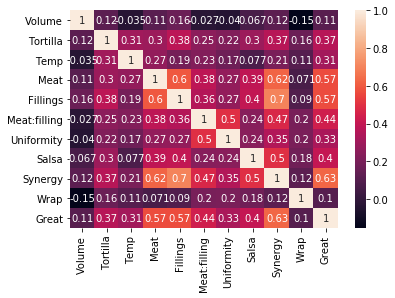

,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Great
Volume,1.000000,0.124036,-0.035125,0.113757,0.164362,-0.027203,-0.039673,0.066883,0.123523,-0.154131,0.111052
Tortilla,0.124036,1.000000,0.308306,0.296485,0.378072,0.252916,0.223493,0.295089,0.368487,0.164578,0.368326
Temp,-0.035125,0.308306,1.000000,0.271021,0.191461,0.225388,0.174726,0.076942,0.205996,0.105642,0.314147
Meat,0.113757,0.296485,0.271021,1.000000,0.596248,0.383710,0.271442,0.389430,0.623712,0.071041,0.571540
Fillings,0.164362,0.378072,0.191461,0.596248,1.000000,0.357133,0.270119,0.396451,0.702205,0.089615,0.568271
Meat:filling,-0.027203,0.252916,0.225388,0.383710,0.357133,1.000000,0.499487,0.240947,0.472286,0.201167,0.440544
Uniformity,-0.039673,0.223493,0.174726,0.271442,0.270119,0.499487,1.000000,0.243594,0.351344,0.204731,0.329931
Salsa,0.066883,0.295089,0.076942,0.389430,0.396451,0.240947,0.243594,1.000000,0.497384,0.177203,0.404614
Synergy,0.123523,0.368487,0.205996,0.623712,0.702205,0.472286,0.351344,0.497384,1.000000,0.123623,0.627137
Wrap,-0.154131,0.164578,0.105642,0.071041,0.089615,0.201167,0.204731,0.177203,0.123623,1.000000,0.103915


In [446]:
#Lets see the correlation of some of the numerical features with each other and with our target column
df_corr = df1[['Volume','Tortilla','Temp','Meat','Fillings',
                 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy','Wrap', 'Great']]
corr = df_corr.corr()
sns.heatmap(corr, annot=True)
plt.show()
corr

From the above heatmap we can see that our target variable 'Great' is more correlated with Synergy, Fillings and Meat as compared to other features.

## Create dummies for categorical variables <a id="C"></a>
- Created dummies for 'Burrito' using get_dummies
- Created a new df 'df_new'

In [464]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Burrito']

Burrito_dummies = pd.get_dummies(df1['Burrito'])
Burrito_dummies.head()

,Other,al pastor,california,carne asada,carnitas,surf n turf
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [476]:
df_new = df1.drop(['Burrito'],axis=1)

In [477]:
df_new = pd.concat([df_new, Burrito_dummies],axis=1)
df_new.head()

,Date,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,...,Avocado,Corn,Zucchini,Great,Other,al pastor,california,carne asada,carnitas,surf n turf
0,1/18/2016,1,3.0,NaN,NaN,NaN,3.0,5.0,3.0,3.5,...,0,0,0,0,0,0,1,0,0,0
1,1/24/2016,1,3.5,NaN,NaN,NaN,2.0,3.5,2.5,2.5,...,0,0,0,0,0,0,1,0,0,0
2,1/24/2016,1,1.5,NaN,NaN,NaN,3.0,2.0,2.5,3.0,...,0,0,0,0,0,0,0,0,1,0
3,1/24/2016,1,2.0,NaN,NaN,NaN,3.0,2.0,3.5,3.0,...,0,0,0,0,0,0,0,1,0,0
4,1/27/2016,1,4.0,NaN,NaN,NaN,4.0,5.0,4.0,3.5,...,0,0,0,1,0,0,1,0,0,0


## Train/Validate/Test split <a id="D"></a>
- Train on reviews from 2016 & earlier. 
- Validate on 2017. 
- Test on 2018 & later.
- Drop the redundant column 'Date' from all the new data frames.

In [492]:
# We have divided our dataset on the following basis.
# Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
df_new['Date'] = pd.to_datetime(df_new['Date'])
start= '12/31/2016'
end= '12/31/2017'
train = df_new[df_new['Date'] <= start]
validate = df_new[(df_new['Date']>start) & (df_new['Date']<=end)]
test = df_new[df_new['Date']>end]
train.head()

,Date,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,...,Avocado,Corn,Zucchini,Great,Other,al pastor,california,carne asada,carnitas,surf n turf
0,2016-01-18,1,3.0,NaN,NaN,NaN,3.0,5.0,3.0,3.5,...,0,0,0,0,0,0,1,0,0,0
1,2016-01-24,1,3.5,NaN,NaN,NaN,2.0,3.5,2.5,2.5,...,0,0,0,0,0,0,1,0,0,0
2,2016-01-24,1,1.5,NaN,NaN,NaN,3.0,2.0,2.5,3.0,...,0,0,0,0,0,0,0,0,1,0
3,2016-01-24,1,2.0,NaN,NaN,NaN,3.0,2.0,3.5,3.0,...,0,0,0,0,0,0,0,1,0,0
4,2016-01-27,1,4.0,NaN,NaN,NaN,4.0,5.0,4.0,3.5,...,0,0,0,1,0,0,1,0,0,0


In [493]:
train.drop(columns=['Date'], inplace=True)
validate.drop(columns=['Date'], inplace=True)
test.drop(columns=['Great', 'Date'], inplace=True)

In [480]:
train.shape, validate.shape, test.shape 

((298, 55), (85, 55), (38, 54))

## Imputer for missing values<a id="E"></a>
- Used Simple Imputer for imputing missing values in train, validate and test datasets.

In [491]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
train_imputed = imputer.fit_transform(train)
validate_imputed= imputer.fit_transform(validate)
test_imputed = imputer.fit_transform(test)
X_train_imputed= pd.DataFrame(train_imputed)
X_train_imputed. head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,3.0,19.829886,22.042241,0.77092,3.0,5.0,3.0,3.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,3.5,19.829886,22.042241,0.77092,2.0,3.5,2.5,2.5,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.5,19.829886,22.042241,0.77092,3.0,2.0,2.5,3.0,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,2.0,19.829886,22.042241,0.77092,3.0,2.0,3.5,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,4.0,19.829886,22.042241,0.77092,4.0,5.0,4.0,3.5,4.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Data Transformation: Scaling <a id="F"></a>
- Used Standard Scaler to scale the data.

In [484]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_imputed)
validate_scaled = scaler.fit_transform(validate_imputed)
test_scaled = scaler.fit_transform(test_imputed)
X_train_scaled_df = pd.DataFrame(train_scaled)
X_validate_df= pd.DataFrame(validate_scaled)
X_test_df= pd.DataFrame(test_scaled)
X_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,-0.524307,0.0,0.0,0.0,-0.593162,1.340696,-0.645992,-0.022447,0.458224,...,-0.213574,-0.082199,-0.058026,-0.832575,-0.7,-0.213574,1.168366,-0.358870,-0.222027,-0.213574
1,0.0,0.064423,0.0,0.0,0.0,-1.849023,-0.213867,-1.231964,-1.202403,-1.486989,...,-0.213574,-0.082199,-0.058026,-0.832575,-0.7,-0.213574,1.168366,-0.358870,-0.222027,-0.213574
2,0.0,-2.290496,0.0,0.0,0.0,-0.593162,-1.768429,-1.231964,-0.612425,0.944528,...,-0.213574,-0.082199,-0.058026,-0.832575,-0.7,-0.213574,-0.855896,-0.358870,4.503967,-0.213574
3,0.0,-1.701766,0.0,0.0,0.0,-0.593162,-1.768429,-0.060021,-0.612425,0.458224,...,-0.213574,-0.082199,-0.058026,-0.832575,-0.7,-0.213574,-0.855896,2.786522,-0.222027,-0.213574
4,0.0,0.653153,0.0,0.0,0.0,0.662698,1.340696,0.525950,-0.022447,0.944528,...,-0.213574,-0.082199,-0.058026,1.201092,-0.7,-0.213574,1.168366,-0.358870,-0.222027,-0.213574


## Model Fitting: Classification <a id="G"></a>
- Used Logistic Regression for training the data
- Calculated accuracy on validation data.

In [494]:
from sklearn.linear_model import LogisticRegression

target='Great'
y_train = train[target]
y_validate = validate[target]

clf = LogisticRegression()
clf.fit(X_train_imputed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [497]:
print(f'Model Accuracy Score: {clf.score(X_validate_df, y_validate)}')

Model Accuracy Score: 1.0


In [531]:
train.columns

Index(['Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp',
       'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy',
       'Wrap', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork',
       'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato',
       'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro',
       'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales',
       'Lobster', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn',
       'Zucchini', 'Great', 'Other', 'al pastor', 'california', 'carne asada',
       'carnitas', 'surf n turf'],
      dtype='object')

## Create visualization of model coefficients <a id="H"></a>
- Used the model coef_ features to get the value of all the coefficients
- Used a subset of the features for visualization because a lot of ingredients had a same value of -0.179.
- The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- We can see that Synergy has the most positive correlation with the target variable which was observed in the heatmap as well.

In [529]:
clf.coef_

array([[-1.79942129e-01,  6.11575367e-03, -1.42249058e-01,
        -2.96354004e-01,  2.26258877e-01,  3.76748110e-01,
         1.07700042e-01,  6.68498951e-01,  5.87995934e-01,
         5.27081540e-01, -2.13764549e-03,  2.24462130e-01,
         7.25625593e-01, -2.82581333e-02, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01, -1.79942129e-01,
        -1.79942129e-01, -1.79942129e-01,  2.34355617e-02,
         1.95883086e-03,  5.86688592e-02,  1.59258070e-01,
        -2.08320084e-01, -7.33655981e-03,  1.27955529e-02,
         5.00814880e+00, -1.03927728e-01, -8.95258563e-0

In [542]:
coeff_df = pd.DataFrame(zip(train.columns,np.transpose(clf.coef_)))
coeff_df

,0,1
0,Chips,[-0.17994212884860733]
1,Hunger,[0.0061157536738937]
2,Length,[-0.14224905764865572]
3,Circum,[-0.2963540043451781]
4,Volume,[0.22625887730530342]
5,Tortilla,[0.37674811024967364]
6,Temp,[0.10770004155025811]
7,Meat,[0.6684989508145869]
8,Fillings,[0.5879959341783942]
9,Meat:filling,[0.5270815402609953]


In [553]:
coeff_df.columns=['Burrito_Features', 'Model_Coefficient']
coeff_df['Model_Coefficient']=coeff_df['Model_Coefficient'].astype('float')

In [571]:
Features=['Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp',
       'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy',
       'Wrap', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn',
       'Zucchini', 'Other', 'al pastor', 'california', 'carne asada',
       'carnitas', 'surf n turf']
coeff_df_vis= coeff_df.loc[coeff_df['Burrito_Features'].isin (Features)]
coeff_df_vis['Model_Coefficient']=coeff_df_vis['Model_Coefficient'].astype('float')

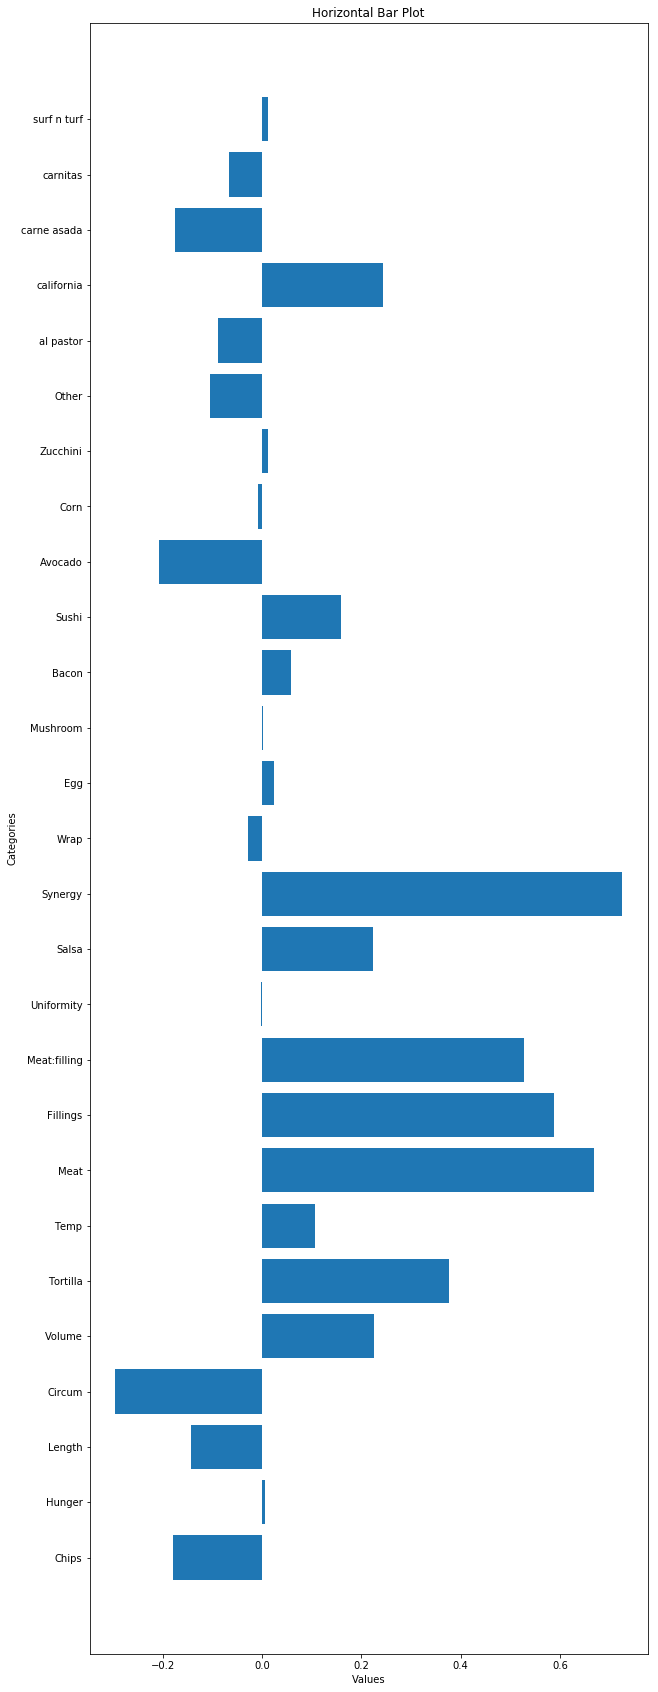

In [572]:
y= coeff_df_vis['Model_Coefficient']
x= coeff_df_vis['Burrito_Features']
plt.figure(figsize=(10,30))
plt.barh(x,y)
plt.xlabel("Values")
plt.ylabel('Categories')
plt.title('Horizontal Bar Plot')
plt.show()

## Train/Validate/Test split for creating a pipeline <a id="I"></a>
- Train on reviews from 2016 & earlier. 
- Validate on 2017. 
- Test on 2018 & later.
- Drop the redundant column 'Date' from all the new data frames.
- Used the df1 data frame for train-test split for creating the pipeline.

In [314]:
# We have divided our dataset on the following basis.
# Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
df1['Date'] = pd.to_datetime(df1['Date'])
start= '12/31/2016'
end= '12/31/2017'
train = df1[df1['Date'] <= start]
validate = df1[(df1['Date']>start) & (df1['Date']<=end)]
test = df1[df1['Date']>end]

In [315]:
train.shape, validate.shape, test.shape 

((298, 52), (85, 52), (38, 52))

In [316]:
train.drop(columns=['Date'], inplace=True)
validate.drop(columns=['Date'], inplace=True)
test.drop(columns=['Great', 'Date'], inplace=True)

## Determine baseline accuracy for a naïve classification model <a id="J"></a>
#### For building a baseline model for our classification problem. We can select the class that has the most observations and use that class as the result for all predictions.
- Calculated accuracy score using sklearn metrics accuracy_score.
- We got the accuracy of 59.06%.

In [317]:
train.columns

Index(['Burrito', 'Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla',
       'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa',
       'Synergy', 'Wrap', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
       'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'],
      dtype='object')

In [319]:
from sklearn.metrics import accuracy_score

X= ['Burrito', 'Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 
    'Meat:filling', 'Uniformity','Salsa', 'Synergy', 'Wrap', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
    'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans','Lettuce', 'Tomato', 'Bell peper', 
    'Carrots', 'Cabbage', 'Sauce','Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham','Chile relleno', 
    'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom','Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']

target='Great'
X_train= train[X]
y_train=train[target]
majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)
accuracy_score(y_train, y_pred)

0.5906040268456376

## Create a `scikit-learn` pipeline <a id="K"></a>

#### Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. 
- Here we are using pipeline for 
    1. Preprocessing: It has 2 stages i.e. segregating the Numerical and Categorical features:
        - Numerical features: We are applying the following preprocessing to numerical features
                     Imputer(Simple Imputer with median): to fill in any missing values
                     Scaler (Standard Scaler): to standardize scale the values before applying our classifier.
        - Categorical features: We are applying the following preprocessing to categorical features
                     Imputer(Simple Imputer with constant strategy): to fill in any missing values
                     Encoding (One hot encoder): To convert cetrgorical variables to numerical values
    2. Classification: We are using the Logistic Regression classifier to classify our test data points as Great or not. 

In [463]:
df1.head()

,Burrito,Date,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,california,1/18/2016,1,3.0,NaN,NaN,NaN,3.0,5.0,3.0,...,1,1,0,0,0,0,0,0,0,0
1,california,1/24/2016,1,3.5,NaN,NaN,NaN,2.0,3.5,2.5,...,1,1,0,0,0,0,0,0,0,0
2,carnitas,1/24/2016,1,1.5,NaN,NaN,NaN,3.0,2.0,2.5,...,1,1,0,0,0,0,0,0,0,0
3,carne asada,1/24/2016,1,2.0,NaN,NaN,NaN,3.0,2.0,3.5,...,1,1,0,0,0,0,0,0,0,0
4,california,1/27/2016,1,4.0,NaN,NaN,NaN,4.0,5.0,4.0,...,1,1,0,0,0,0,0,0,0,1


In [329]:
X_train.columns

Index(['Burrito', 'Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla',
       'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa',
       'Synergy', 'Wrap', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
       'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [448]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV

numeric_features = ['Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla',
       'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa',
       'Synergy', 'Wrap', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
       'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Burrito']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

## Train model using training data <a id="L"></a>

In [447]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [392]:
clf.named_steps

{'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('num', Pipeline(memory=None,
      steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
        strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['Chips', 'Hunger', 'Length', 'Circum', 'Volume', 'Tortilla...lass 'numpy.float64'>, handle_unknown='ignore',
        n_values=None, sparse=True))]), ['Burrito'])]),
 'classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False)}

## Get model's validation accuracy <a id="M"></a>
- We got an accuracy of 76.5% for the model using logistic regression.

In [384]:
X_validate= validate[X]
y_validate=validate[target]

In [385]:
X_validate.head()

,Burrito,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
299,california,0,4.0,23.0,20.5,0.77,4.0,4.5,4.0,3.5,...,0,0,0,0,0,0,0,0,0,0
300,Other,0,4.0,20.5,21.5,0.75,4.0,2.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
301,Other,0,3.9,21.0,21.0,0.74,3.0,4.5,4.1,3.0,...,0,0,0,0,0,0,0,0,0,0
302,Other,0,4.0,20.5,21.0,0.72,3.5,4.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
303,Other,0,3.5,18.5,22.5,0.75,2.5,4.5,3.0,2.5,...,0,0,0,0,0,0,0,0,0,0


In [386]:
print("model score: %.3f" % clf.score(X_validate, y_validate))

model score: 0.765


## Get your model's test accuracy <a id="N"></a>

In [387]:
X_test= test[X]
X_test.head()

,Burrito,Chips,Hunger,Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
77,california,0,4.0,21.590000,23.500000,0.787143,4.5,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
384,california,0,4.0,18.333333,24.166667,0.853333,4.0,5.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0
385,Other,0,3.0,19.000000,22.000000,0.770000,3.0,5.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
386,california,0,5.0,19.000000,22.000000,0.770000,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
387,Other,0,4.0,21.000000,23.500000,0.920000,4.0,4.0,3.0,3.5,...,0,0,0,0,0,0,0,0,0,0


In [388]:
y_pred = clf.predict(X_test)
print(f'Test Accuracy Score: {clf.score(X_test, y_pred)}')

Test Accuracy Score: 1.0
